# Machine Learning
1. Supervised
2. Unsupervised
3. Reinforcement


## Regression
1. Linear Regression
2. Multiple Regression
3. Polynomial

# HW
- differentiate between regression and classification

## Hands on Simple Linear Regression

### importing libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()
# D5data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [3]:
dataset = pd.read_csv('D5data1.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### define x & Y

In [7]:
# independent var
x = dataset.iloc[ : , :-1].values
x[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [8]:
# dependent var
y = dataset.iloc[ : , -1].values
y[:5]

array([39343., 46205., 37731., 43525., 39891.])

### Splitting
- Splitting the training data & testing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [11]:
x_train[:5]

array([[2.9],
       [5.1],
       [3.2],
       [4.5],
       [8.2]])

In [12]:
y_train[:5]

array([ 56642.,  66029.,  64445.,  61111., 113812.])

### Modeling
- Modeling the Simple Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()

### Training
- Training the Simple Linear Regression Model

In [15]:
regressor.fit(x_train, y_train)

LinearRegression()

### Prediction
- predicting the test data

In [16]:
y_pred = regressor.predict(x_test)
y_pred[:5]

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369])

### Visualize
- visualize the Training dataset

#### Cross-Validation: training data vs predicted data

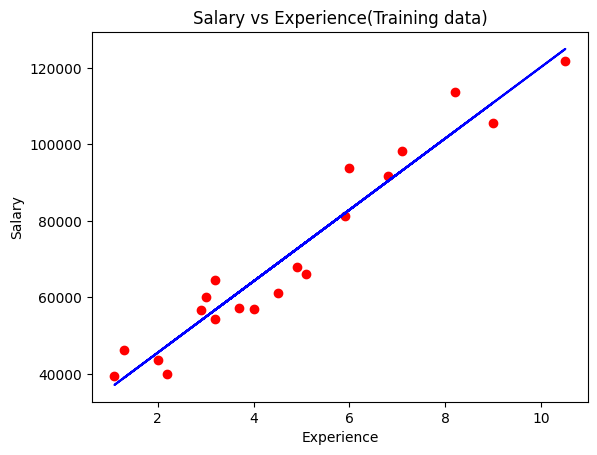

In [17]:
plt.scatter(x_train, y_train, color='red')
# training data points
plt.plot(x_train, regressor.predict(x_train), color='blue')
# predicted data line
plt.title('Salary vs Experience(Training data)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

#### Cross-Validation: testing data vs predicted data

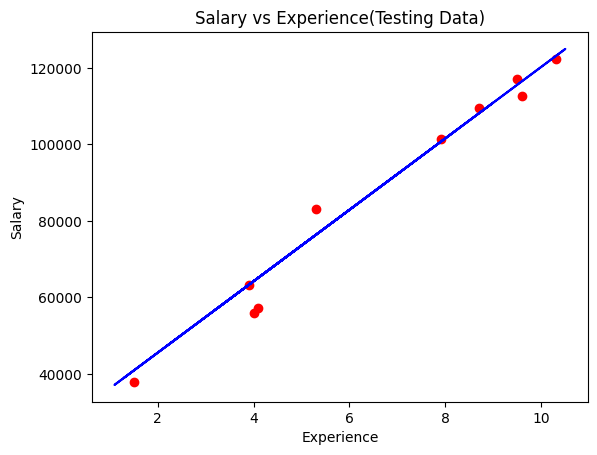

In [18]:
plt.scatter(x_test, y_test, color='red')
# testing data points
plt.plot(x_train, regressor.predict(x_train), color='blue')
# predicted data line
plt.title('Salary vs Experience(Testing Data)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### Prediction

In [19]:
print(regressor.predict([[31]]))
# prediction with custom input

[316540.40798082]


### Evaluation

#### Regressor Coefficient

In [20]:
b = regressor.coef_
# Regressor Coefficient property
b

array([9345.94244312])

#### y intercept

In [21]:
a = regressor.intercept_
# y intercept property
a

26816.192244031183

#### Mean Square Error (MSE)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, y_pred)
# Mean Square Error (MSE)

21026037.329511296

#### r2_score
- R-Squared

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test, y_pred)

0.9749154407708353

#### Regression Summary

In [26]:
import statsmodels.api as sm

In [27]:
x_stats = sm.add_constant(x_train)

In [28]:
regsummary = sm.OLS(y_train, x_stats).fit()
print(regsummary.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.51e-12
Time:                        23:27:10   Log-Likelihood:                -202.60
No. Observations:                  20   AIC:                             409.2
Df Residuals:                      18   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.682e+04   3033.148      8.841      0.0

#### R-Squared
- coefficient of determination
- using OLS Regression model for Linear regression

In [29]:
regsummary.rsquared_adj

0.9347561124721737

## Hands on Multiple Linear Regression

### importing libs

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import dataset

In [31]:
# from google.colab import files
# uploaded = files.upload()
# D5data2.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [32]:
dataset = pd.read_csv('D5data2.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
dataset.shape

(50, 5)

In [34]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### define X & Y

In [36]:
# independent vars
x = dataset.iloc[ : ,  : -1].values
x[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [37]:
# dependent var
y = dataset.iloc[ : , -1].values
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

### Transformation

#### OneHotEncoder & ColumnTransformer

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [39]:
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [3])], remainder='passthrough')

In [40]:
x = np.array(ct.fit_transform(x))

In [41]:
x[:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

### Splitting

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [44]:
x_train[:5]

array([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57]], dtype=object)

### Modeling

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regressor = LinearRegression()

### Training

In [47]:
regressor.fit(x_train, y_train)

LinearRegression()

### Prediction

In [48]:
y_pred = regressor.predict(x_test)
# prediction from testing data
y_pred[:5]

array([103015.20159796, 132582.27760815, 132447.73845174,  71976.09851258,
       178537.48221056])

### visualization

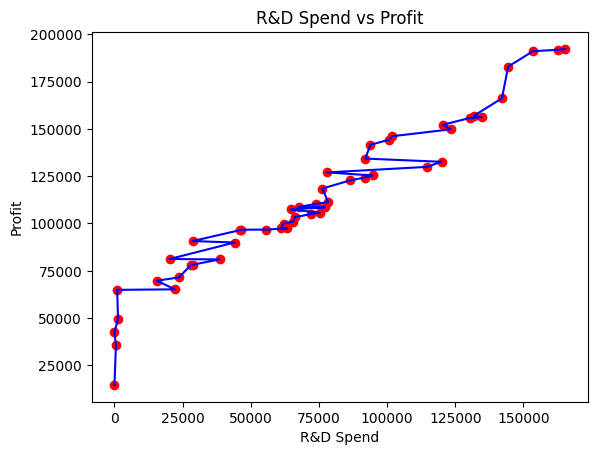

In [49]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], color='red')
plt.plot(dataset['R&D Spend'], dataset['Profit'], color='blue') # actual dataset
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

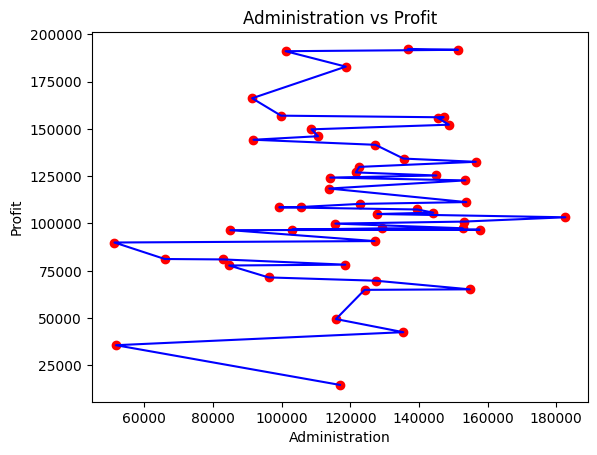

In [50]:
plt.scatter(dataset['Administration'], dataset['Profit'], color='red')
plt.plot(dataset['Administration'], dataset['Profit'], color='blue') # actual dataset
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

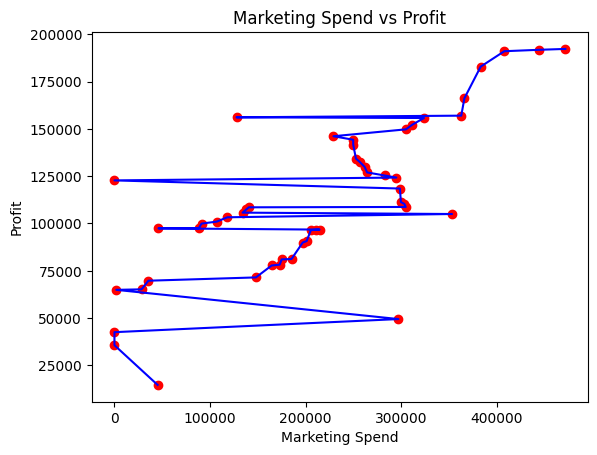

In [51]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], color='red')
plt.plot(dataset['Marketing Spend'], dataset['Profit'], color='blue') # actual dataset
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

## Hands on Polynomial Linear Regression
- first start with  building the linear regression model, then move to build polynomial regression model
- prone to outliers
- degree is most important

### importing libs

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import dataset

In [53]:
# from google.colab import files
# uploaded = files.upload()
# D5data4.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [54]:
dataset = pd.read_csv('D5data4.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [55]:
dataset.shape

(10, 3)

In [56]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


### define X & Y

In [58]:
# independent vars
x = dataset.iloc[ : ,  1:2].values
x[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [59]:
# dependent vars
y = dataset.iloc[ : , -1].values
y[:5]

array([ 45000,  50000,  60000,  80000, 110000], dtype=int64)

### Splitting

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [62]:
x_train[:5]

array([[10],
       [ 2],
       [ 7],
       [ 8],
       [ 4]], dtype=int64)

In [63]:
y_train[:5]

array([1000000,   50000,  200000,  300000,   80000], dtype=int64)

### transformation

In [64]:
# from sklearn.preprocessing import LabelEncoder

In [65]:
# labelencoder = LabelEncoder()
# x[:, 0] = labelencoder.fit_transform(x[:, 0])

In [66]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

In [67]:
# ct = ColumnTransformer([('encode', OneHotEncoder(), [0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [68]:
# x[:5]

### Linear model (for comparison)

#### Modeling Linear Model

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lin_reg = LinearRegression()

#### Training Linear Model

In [71]:
lin_reg.fit(x, y)

LinearRegression()

### Polynomial Modeling

#### Modeling Polynomial Model

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly_reg = PolynomialFeatures(degree=4)
# degree = number of features

#### Training Polynomial Model on ```x```

In [74]:
x_poly = poly_reg.fit_transform(x)

#### Modeling Linear Model

In [75]:
lin_reg2 = LinearRegression()

#### Training Linear Model On Polynomial Model

In [76]:
lin_reg2.fit(x_poly, y)

LinearRegression()

### Visualization

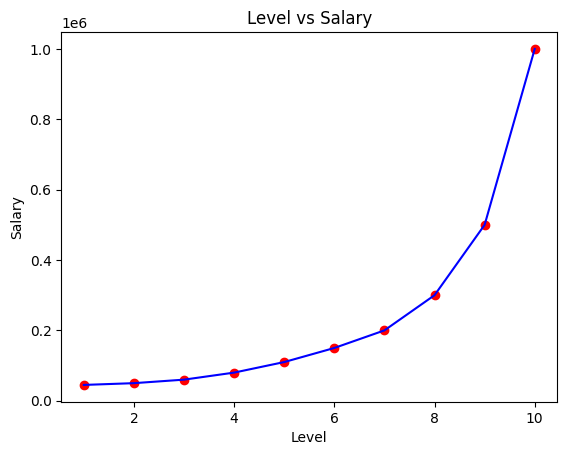

In [77]:
plt.scatter(x, y, color='red')
plt.plot(x, y, color='blue') # actual dataset
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# HW:
-----------
    Build the Regression Model for Linear, MultiLinear and Polynomial Regression
    Use dataset:
    --------------
    a.	Day5data3.csv and
    b.	Ecommerce Customer.txt